In [6]:
# import librarys
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("sample_data/cancer2.csv")
data.head()

,type,gender,age,days
0,lung,2,61,124
1,lung,1,69,42
2,lung,2,73,25
3,lung,2,66,45
4,lung,1,63,312


In [3]:
# make a factor
data.gender = data.gender.astype(str)

In [4]:
cancer_lm = smf.ols('days~type+gender+type*gender', data=data).fit()
table = sm.stats.anova_lm(cancer_lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
type,3.0,1.198172e+06,399390.722222,3.436025,0.025759
gender,1.0,7.394977e+04,73949.774278,0.636202,0.429799
type:gender,3.0,1.349959e+05,44998.640055,0.387131,0.762858
Residual,40.0,4.649451e+06,116236.270139,NaN,NaN


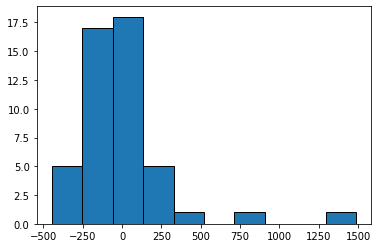

In [5]:
plt.hist(cancer_lm.resid, edgecolor='black')
plt.show()

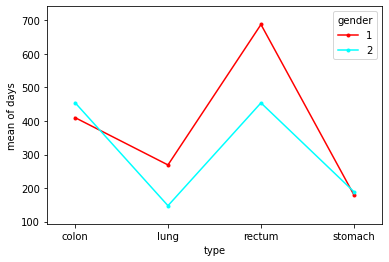

In [7]:
# make interaction plot
interaction_plot(data['type'], data['gender'], data['days'])
plt.show()

In [8]:
# make type III ANOVA
model = smf.ols('days~C(type, Sum) +C(gender, Sum) +C(type, Sum)*C(gender, Sum)',
                data=data).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,5.102456e+06,1.0,43.897280,6.253351e-08
"C(type, Sum)",1.113543e+06,3.0,3.193332,3.366908e-02
"C(gender, Sum)",5.931342e+04,1.0,0.510283,4.791645e-01
"C(type, Sum):C(gender, Sum)",1.349959e+05,3.0,0.387131,7.628583e-01
Residual,4.649451e+06,40.0,NaN,NaN
